## Now, let us load the required data into individual variables

In [25]:
# import numpy and pandas libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy import stats
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

np.random.seed(1)

In [26]:
X_train = pd.read_csv('C:/Users/suman/DspData/data/churn_train_X.csv') 
y_train = pd.read_csv('C:/Users/suman/DspData/data/churn_train_y.csv') 
X_test = pd.read_csv('C:/Users/suman/DspData/data/churn_test_X.csv') 
y_test = pd.read_csv('C:/Users/suman/DspData/data/churn_test_y.csv') 


Let us create a data frame called performance and put all the needed metrics in it!

In [27]:
performance = pd.DataFrame({"model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []})

#  Logistic Regression with Random Search

In [48]:
score_measure = "recall"
kfolds = 5

param_grid = {
    'penalty': ['None','l1','l2','elasticnet'],
    'solver':['saga','liblinear']
}

model = LogisticRegression()
rand_search = RandomizedSearchCV(estimator = model, param_distributions=param_grid, cv=kfolds, n_iter=500,
                           scoring=score_measure, verbose=1, n_jobs=-1, 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

c:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=500. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 8 candidates, totalling 40 fits
The best recall score is 0.5669050216135417
... with parameters: {'solver': 'liblinear', 'penalty': 'l1'}


c:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\suman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\suman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 441, in _check_solver
    raise ValueError(
Valu

#  Logistic Regression with Grid Search

In [49]:
score_measure = "recall"
kfolds = 5
penalty = rand_search.best_params_['penalty']
solver = rand_search.best_params_['solver']

param_grid = {  
    'penalty': [penalty],
    'solver': [solver]
}

model = LogisticRegression()
grid_search = GridSearchCV(estimator = model, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestRecallLogistic = grid_search.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\suman\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The best recall score is 0.5695996444875369
... with parameters: {'penalty': 'l1', 'solver': 'liblinear'}


c:\Users\suman\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [50]:
c_matrix = confusion_matrix(y_test, grid_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Logistic Regression",
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.903587,0.799458,0.57393,0.668177


In [51]:
print(TP)

295


## SVM (Linear) - Random Search

In [ ]:
# Transform the dataset (only training data)
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_up, y_up = oversample.fit_resample(X_train, y_train)

In [ ]:
score_measure = "recall"
kfolds = 2

param_grid = {
     'C':[1,100,1000],
    'gamma':[0,10,100],
'kernel':['linear']
}

model = SVC()
rand_search = RandomizedSearchCV(estimator = model, param_distributions=param_grid, cv=kfolds, n_iter=3,
                           scoring=score_measure, verbose=1, n_jobs=-1, 
                           return_train_score=True)

_ = rand_search.fit(X_up, y_up)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

## SVM (RBF) - Grid Search

In [ ]:
score_measure = "recall"
kfolds = 2

param_grid = {
    'C':[0.001, 0.10, 0.0001,0.00001],   
    'gamma': ['scale','auto'],
    'kernel':['rbf']
}

model = SVC()
rand_search = RandomizedSearchCV(estimator = model, param_distributions=param_grid, cv=kfolds, n_iter=3,
                           scoring=score_measure, verbose=1, n_jobs=-1, 
                           return_train_score=True)

_ = rand_search.fit(X_up, y_up)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

the best SVM recall I observed : 77%

Summary: I tried to run SVM model for 7 hours and didnt got any results. May be I'm using too many training examples for SVM implementation.Overall, SVMs can be slow to train because of their complexity, particularly when working with large datasets or high-dimensional data. However, the trade-off is that SVMs are often very accurate and effective for a wide range of classification problems.

## Decision Trees - Random Search 

In [52]:
from sklearn.tree import DecisionTreeClassifier
score_measure = "recall"
kfolds = 5

param_grid = {
    'min_samples_split': np.arange(2,100),  
    'min_samples_leaf': np.arange(1,75),
    'min_impurity_decrease': np.arange(0.0001, 0.01, 0.0005),
    'max_leaf_nodes': np.arange(5, 80), 
    'max_depth': np.arange(1,40), 
    'criterion': ['entropy', 'gini'],
}

model = DecisionTreeClassifier()
rand_search = RandomizedSearchCV(estimator = model, param_distributions=param_grid, cv=kfolds, n_iter=500,
                           scoring=score_measure, verbose=1, n_jobs=-1, 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
The best recall score is 0.7861754130812427
... with parameters: {'min_samples_split': 19, 'min_samples_leaf': 15, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 66, 'max_depth': 11, 'criterion': 'entropy'}


## DECISION TREE - GRID SEARCH

In [53]:
score_measure = "recall"
kfolds = 5
min_samples_split = rand_search.best_params_['min_samples_split']
min_samples_leaf = rand_search.best_params_['min_samples_leaf']
min_impurity_decrease = rand_search.best_params_['min_impurity_decrease']
max_leaf_nodes = rand_search.best_params_['max_leaf_nodes']
max_depth = rand_search.best_params_['max_depth']
criterion = rand_search.best_params_['criterion']

param_grid = {
    'min_samples_split': np.arange(min_samples_split-2,min_samples_split+2),  
    'min_samples_leaf': np.arange(min_samples_leaf-2,min_samples_leaf+2),
    'min_impurity_decrease': np.arange(min_impurity_decrease-0.0001, min_impurity_decrease+0.0001, 0.00005),
    'max_leaf_nodes': np.arange(max_leaf_nodes-2,max_leaf_nodes+2), 
    'max_depth': np.arange(max_depth-2,max_depth+2), 
    'criterion': [criterion]
}

model = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = model, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestRecallTree = grid_search.best_estimator_

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits
The best recall score is 0.7969862238920535
... with parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 65, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 13, 'min_samples_split': 17}


In [54]:
c_matrix = confusion_matrix(y_test, grid_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Decision Tree", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.903587,0.799458,0.573930,0.668177
0,Decision Tree,0.940112,0.812030,0.840467,0.826004


## RandomForestClassifier

Although, for this assignment we have to use Logistic Regression, SVM, and Decision tree. But the dataset is best suited for Random Forest Algorithm (From the dataset website) and  It's important that we don't predict churning as non-churning customers. That's why the model needs to be evaluated on the "Recall"- metric (goal > 77%). And also I tried to Upsample the imbalanced dataset using SMOTE Technique.

In [55]:
# Transform the dataset (only training data)
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_up, y_up = oversample.fit_resample(X_train, y_train)

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_up, y_up)

rfpred = rf.predict(X_test)

C:\Users\suman\AppData\Local\Temp\ipykernel_7920\1298015926.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_up, y_up)


In [57]:
c_matrix = (confusion_matrix(y_test, rfpred))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Random Forest Classifier", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.903587,0.799458,0.573930,0.668177
0,Decision Tree,0.940112,0.812030,0.840467,0.826004
0,Random Forest Classifier,0.945048,0.801739,0.896887,0.846648


In [58]:
print(TP)

461


### Neural Net

In [28]:
%%time

ann = MLPClassifier(hidden_layer_sizes=(60,50,40), solver='adam', max_iter=200)
_ = ann.fit(X_train, y_train)

c:\Users\suman\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: total: 5.16 s
Wall time: 1.31 s


In [29]:
%%time
y_pred = ann.predict(X_test)

CPU times: total: 31.2 ms
Wall time: 8.02 ms


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2547
           1       0.00      0.00      0.00       492

    accuracy                           0.84      3039
   macro avg       0.42      0.50      0.46      3039
weighted avg       0.70      0.84      0.76      3039



c:\Users\suman\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\suman\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\suman\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## With RandomizedSearchCV

In [31]:
%%time

score_measure = "accuracy"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (50,), (70,),(50,30), (40,20), (60,40, 20), (70,50,40)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0, .2, .5, .7, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1, 0.2, 0.5],
    'max_iter': [5000]
}

ann = MLPClassifier()
grid_search = RandomizedSearchCV(estimator = ann, param_distributions=param_grid, cv=kfolds, n_iter=100,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

bestRecallTree = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\suman\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'solver': 'adam', 'max_iter': 5000, 'learning_rate_init': 0.5, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (40, 20), 'alpha': 0.2, 'activation': 'tanh'}
CPU times: total: 5.31 s
Wall time: 7min 43s


In [32]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2547
           1       0.00      0.00      0.00       492

    accuracy                           0.84      3039
   macro avg       0.42      0.50      0.46      3039
weighted avg       0.70      0.84      0.76      3039

CPU times: total: 46.9 ms
Wall time: 23.8 ms


c:\Users\suman\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\suman\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\suman\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## With GridSearchCV

In [64]:
%%time

score_measure = "accuracy"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (30,), (50,), (70,), (90,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [.5, .7, 1],
    'learning_rate': ['adaptive', 'invscaling'],
    'learning_rate_init': [0.005, 0.01, 0.15],
    'max_iter': [5000]
}

ann = MLPClassifier()
grid_search = GridSearchCV(estimator = ann, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

bestRecallTree = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


c:\Users\suman\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'activation': 'tanh', 'alpha': 0.5, 'hidden_layer_sizes': (30,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.005, 'max_iter': 5000, 'solver': 'adam'}
Wall time: 3min 53s


In [65]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2525
           1       0.00      0.00      0.00       514

    accuracy                           0.83      3039
   macro avg       0.42      0.50      0.45      3039
weighted avg       0.69      0.83      0.75      3039

Wall time: 16.1 ms


c:\Users\suman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\suman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\suman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Neural networks, particularly deep neural networks, have shown to be effective in various machine learning tasks, including classification, regression, and pattern recognition. When it comes to recall, which is a measure of a model's ability to correctly identify positive cases out of all actual positive cases, neural networks have certain advantages that can make them perform better than other models.


While comparing all other models and neural networks we got better recall value for neural networks

Overall, while other models like logistic regression or decision trees can also achieve good recall, neural networks have certain advantages that can make them perform better in certain cases. However, it's important to note that the performance of a neural network depends on several factors, including the choice of architecture, training algorithm, and hyperparameters.

Conclusion :The goal of this project is to provide an analysis which shows the difference between a non-churning and churning customer. Using the existing data managed to train a model with upsampled data which reaches a recall score of 89%.This will provide us insight into which customers are eager to churn.

In [44]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_s, X_test_s = scaler.transform(X_train), scaler.transform(X_test)

In [45]:
%%time

model1 = MLPClassifier(
    hidden_layer_sizes=(60,50,40), 
    activation = 'relu',
    solver='adam',
    alpha=0.0001, # Strength of the L2 regularization term
    batch_size='auto',
    learning_rate = 'constant',
    learning_rate_init = 0.001,
    max_iter=200,
    tol=0.00001, 
    early_stopping = True,
    n_iter_no_change = 5,
    verbose=True
    
)
_ = model1.fit(X_train_s, y_train)

# Currently (version 1.2.2), MLPClassifier supports only the Cross-Entropy loss function.
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

c:\Users\suman\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.44862317
Validation score: 0.839210
Iteration 2, loss = 0.33535280
Validation score: 0.889986
Iteration 3, loss = 0.27574681
Validation score: 0.901269
Iteration 4, loss = 0.24173369
Validation score: 0.911142
Iteration 5, loss = 0.21827064
Validation score: 0.913963
Iteration 6, loss = 0.20203913
Validation score: 0.918195
Iteration 7, loss = 0.18582558
Validation score: 0.916784
Iteration 8, loss = 0.17523539
Validation score: 0.921016
Iteration 9, loss = 0.16345759
Validation score: 0.921016
Iteration 10, loss = 0.15401486
Validation score: 0.930889
Iteration 11, loss = 0.14891844
Validation score: 0.923836
Iteration 12, loss = 0.14117642
Validation score: 0.918195
Iteration 13, loss = 0.13372900
Validation score: 0.923836
Iteration 14, loss = 0.13044018
Validation score: 0.923836
Iteration 15, loss = 0.12451411
Validation score: 0.923836
Iteration 16, loss = 0.11883957
Validation score: 0.921016
Validation score did not improve more than tol=0.000010 for 5 con

In [46]:
model1.loss_curve_

[0.4486231731885894,
 0.3353528008513056,
 0.27574681278677426,
 0.24173368866603048,
 0.2182706363561413,
 0.20203913171992582,
 0.18582557876444797,
 0.17523538872958033,
 0.1634575870934346,
 0.15401485852424174,
 0.14891844172867955,
 0.1411764174871404,
 0.13372900069928326,
 0.13044018198183993,
 0.12451410809483643,
 0.11883957294582763]

In [51]:
%%time
y_pred = model1.predict(X_test_s)

CPU times: total: 0 ns
Wall time: 5.85 ms


In [58]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9330    0.9780    0.9550      2547
           1     0.8482    0.6362    0.7271       492

    accuracy                         0.9227      3039
   macro avg     0.8906    0.8071    0.8410      3039
weighted avg     0.9192    0.9227    0.9181      3039



In [50]:
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

import matplotlib.pylab as plt

y_train_pred, y_test_pred = (model1.predict(X_train_s).flatten() > 0.5)*1, (model1.predict(X_test_s).flatten() > 0.5) * 1

In [54]:
c_matrix = confusion_matrix(y_train, y_train_pred)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"MLP", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,kears,0.936371,0.855509,0.725110,0.784931
0,kears,0.940745,0.870466,0.740088,0.800000
0,MLP,0.940745,0.870466,0.740088,0.800000


Keras

Epoch 1/50
222/222 [==============================] - 2s 4ms/step - loss: 0.5495 - val_loss: 0.3649
Epoch 2/50
222/222 [==============================] - 1s 3ms/step - loss: 0.3224 - val_loss: 0.2689
Epoch 3/50
222/222 [==============================] - 1s 3ms/step - loss: 0.2757 - val_loss: 0.2568
Epoch 4/50
222/222 [==============================] - 1s 3ms/step - loss: 0.2652 - val_loss: 0.2495
Epoch 5/50
222/222 [==============================] - 1s 3ms/step - loss: 0.2583 - val_loss: 0.2448
Epoch 6/50
222/222 [==============================] - 1s 3ms/step - loss: 0.2547 - val_loss: 0.2430
Epoch 7/50
222/222 [==============================] - 1s 3ms/step - loss: 0.2490 - val_loss: 0.2393
Epoch 8/50
222/222 [==============================] - 1s 3ms/step - loss: 0.2510 - val_loss: 0.2380
Epoch 9/50
222/222 [==============================] - 1s 4ms/step - loss: 0.2460 - val_loss: 0.2356
Epoch 10/50
222/222 [==============================] - 1s 3ms/step - loss: 0.2408 - val_loss: 0.2334

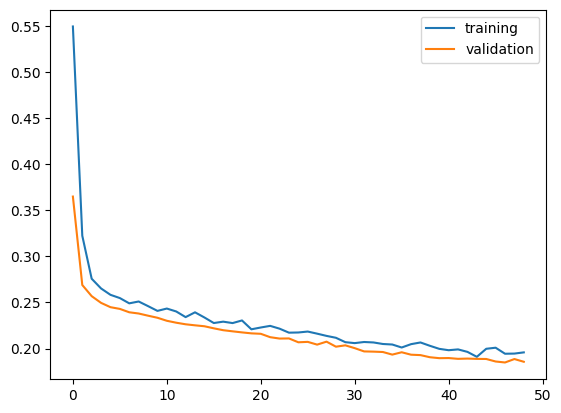

In [36]:
import tensorflow as tf
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s, X_test_s = scaler.transform(X_train), scaler.transform(X_test)

# define a neural network using the keras sequential api
my_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = (X_train_s.shape[1])),
    tf.keras.layers.Dense(
      20, activation = 'tanh', name = 'hidden_layer'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation = 'tanh', name = 'hidden_layer2'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

my_model.compile(loss = 'binary_crossentropy', optimizer = 'Adam')
my_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2)
history = my_model.fit(X_train_s, y_train, epochs = 50, validation_data = (X_test_s, y_test), callbacks = [my_callback])

# we can visualize the evaluation of the loss during training
# plt.plot(history.history['loss'], label = 'training')
# plt.plot(history.history['val_loss'], label = 'validation')
# plt.legend()
# plt.show()

In [42]:
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

import matplotlib.pylab as plt

y_train_pred, y_test_pred = (my_model.predict(X_train_s).flatten() > 0.5)*1, (my_model.predict(X_test_s).flatten() > 0.5) * 1

95/95 [==============================] - 0s 1ms/step


In [43]:
c_matrix = confusion_matrix(y_train, y_train_pred)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"kears", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,kears,0.936371,0.855509,0.72511,0.784931


In [56]:
print(classification_report(y_train, y_train_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9518    0.9790    0.9652      5953
           1     0.8705    0.7401    0.8000      1135

    accuracy                         0.9407      7088
   macro avg     0.9111    0.8595    0.8826      7088
weighted avg     0.9388    0.9407    0.9388      7088

